In [1]:
# import numpy as np
# import matplotlib.pyplot as plt

# def seir_model(beta, sigma, gamma, population, initial_infected, days):
#     """
#     Simulate the SEIR model.

#     Parameters:
#         beta: The rate of infection (transmission rate).
#         sigma: The rate of latent individuals becoming infectious.
#         gamma: The rate of recovery (inverse of the infectious period).
#         population: Total population size.
#         initial_infected: Number of initial infectious individuals.
#         days: Number of days to simulate.

#     Returns:
#         S: NumPy array containing the number of susceptible individuals for each day.
#         E: NumPy array containing the number of exposed individuals for each day.
#         I: NumPy array containing the number of infectious individuals for each day.
#         R: NumPy array containing the number of recovered individuals for each day.
#     """
#     S = np.zeros(days)
#     E = np.zeros(days)
#     I = np.zeros(days)
#     R = np.zeros(days)

#     S[0] = population - initial_infected
#     E[0] = 0
#     I[0] = initial_infected
#     R[0] = 0

#     for day in range(1, days):
#         dS = -beta * S[day-1] * I[day-1] / population
#         dE = beta * S[day-1] * I[day-1] / population - sigma * E[day-1]
#         dI = sigma * E[day-1] - gamma * I[day-1]
#         dR = gamma * I[day-1]

#         S[day] = S[day-1] + dS
#         E[day] = E[day-1] + dE
#         I[day] = I[day-1] + dI
#         R[day] = R[day-1] + dR

#     return S, E, I, R

# if __name__ == "__main__":
#     # Model parameters
#     beta = 0.3     # Infection rate
#     sigma = 0.1    # Latency rate
#     gamma = 0.05   # Recovery rate
#     population = 1000   # Total population size
#     initial_infected = 1   # Number of initial infectious individuals
#     days = 150     # Number of days to simulate

#     # Run the SEIR model
#     S, E, I, R = seir_model(beta, sigma, gamma, population, initial_infected, days)

#     # Plot the results
#     plt.plot(S, label='Susceptible')
#     plt.plot(E, label='Exposed')
#     plt.plot(I, label='Infectious')
#     plt.plot(R, label='Recovered')
#     plt.xlabel('Days')
#     plt.ylabel('Population')
#     plt.legend()
#     plt.title('SEIR Model Simulation')
#     plt.show()

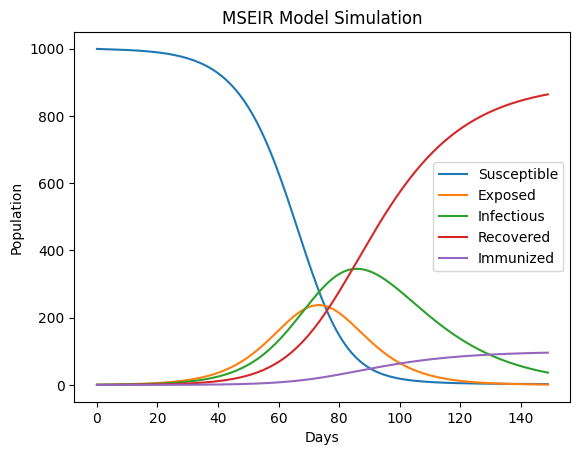

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def mseir_model(beta, sigma, gamma, epsilon, population, initial_infected, initial_immunized, days):
    """
    Simulate the MSEIR model.

    Parameters:
        beta: The rate of infection (transmission rate).
        sigma: The rate of latent individuals becoming infectious.
        gamma: The rate of recovery (inverse of the infectious period).
        epsilon: The rate of individuals becoming immunized (removed).
        population: Total population size.
        initial_infected: Number of initial infectious individuals.
        initial_immunized: Number of initially immunized individuals.
        days: Number of days to simulate.

    Returns:
        S: NumPy array containing the number of susceptible individuals for each day.
        E: NumPy array containing the number of exposed individuals for each day.
        I: NumPy array containing the number of infectious individuals for each day.
        R: NumPy array containing the number of recovered (non-infectious) individuals for each day.
        M: NumPy array containing the number of immunized (removed) individuals for each day.
    """
    S = np.zeros(days)
    E = np.zeros(days)
    I = np.zeros(days)
    R = np.zeros(days)
    M = np.zeros(days)

    S[0] = population - initial_infected - initial_immunized
    E[0] = 0
    I[0] = initial_infected
    R[0] = 0
    M[0] = initial_immunized

    for day in range(1, days):
        dS = -beta * S[day-1] * I[day-1] / population
        dE = beta * S[day-1] * I[day-1] / population - sigma * E[day-1]
        dI = sigma * E[day-1] - gamma * I[day-1]
        dR = gamma * (1 - epsilon) * I[day-1]
        dM = gamma * epsilon * I[day-1]

        S[day] = S[day-1] + dS
        E[day] = E[day-1] + dE
        I[day] = I[day-1] + dI
        R[day] = R[day-1] + dR
        M[day] = M[day-1] + dM

    return S, E, I, R, M

if __name__ == "__main__":
    # Model parameters
    beta = 0.3        # Infection rate
    sigma = 0.1       # Latency rate
    gamma = 0.05      # Recovery rate
    epsilon = 0.1     # Rate of becoming immunized
    population = 1000   # Total population size
    initial_infected = 1   # Number of initial infectious individuals
    initial_immunized = 0  # Number of initially immunized individuals
    days = 150          # Number of days to simulate

    # Run the MSEIR model
    S, E, I, R, M = mseir_model(beta, sigma, gamma, epsilon, population, initial_infected, initial_immunized, days)

    # Plot the results
    plt.plot(S, label='Susceptible')
    plt.plot(E, label='Exposed')
    plt.plot(I, label='Infectious')
    plt.plot(R, label='Recovered')
    plt.plot(M, label='Immunized')
    plt.xlabel('Days')
    plt.ylabel('Population')
    plt.legend()
    plt.title('MSEIR Model Simulation')
    plt.show()
